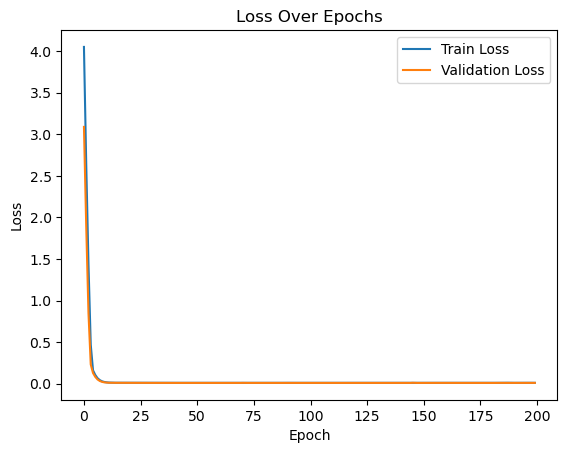

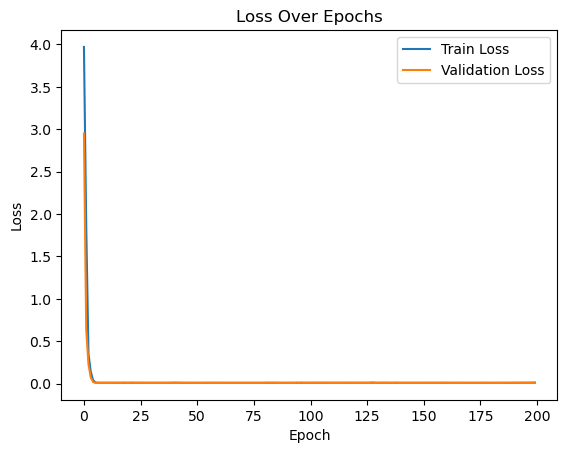

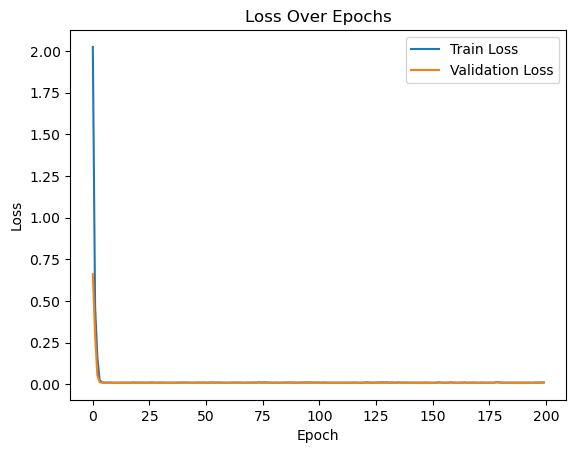

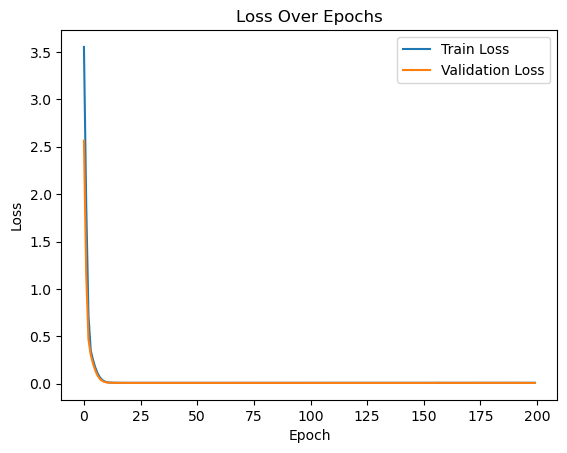

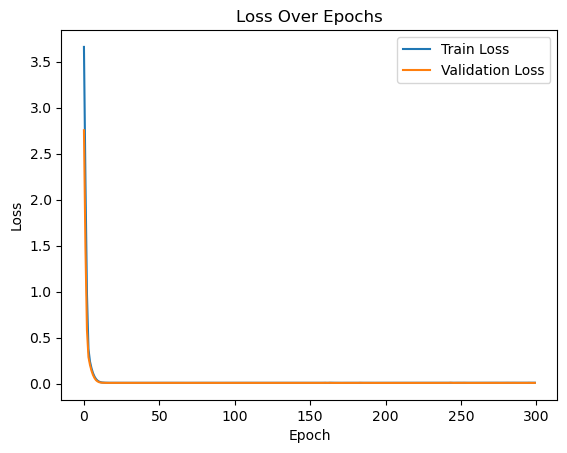

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Створення синтетичного набору даних для регресії
np.random.seed(42)
X_regression = np.random.rand(1000, 1)  # Ознака
y_regression = 2 * X_regression.squeeze() + 1 + 0.1 * np.random.randn(1000)  # Цільова змінна

# Розподіл на тренувальний та тестовий набори
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Нормалізація даних
scaler_reg = StandardScaler()
X_reg_train = scaler_reg.fit_transform(X_reg_train)
X_reg_test = scaler_reg.transform(X_reg_test)

# Побудова та навчання нейронної мережі для регресії
def build_regression_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Функція для візуалізації зміни функції втрат на тренувальному та тестовому наборах
def plot_loss(history):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Навчання базової моделі
model_reg = build_regression_model()
history_reg = model_reg.fit(X_reg_train, y_reg_train, epochs=200, validation_data=(X_reg_test, y_reg_test), verbose=0)

# Візуалізація функції втрат для базової моделі
plot_loss(history_reg)

# Експерименти для покращення результатів
# 1. Більша модель
model_reg_exp1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
model_reg_exp1.compile(optimizer='adam', loss='mean_squared_error')
history_reg_exp1 = model_reg_exp1.fit(X_reg_train, y_reg_train, epochs=200, validation_data=(X_reg_test, y_reg_test), verbose=0)

# 2. Збільшення кількості нейронів
model_reg_exp2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
model_reg_exp2.compile(optimizer='adam', loss='mean_squared_error')
history_reg_exp2 = model_reg_exp2.fit(X_reg_train, y_reg_train, epochs=200, validation_data=(X_reg_test, y_reg_test), verbose=0)

# 3. Зміна швидкості навчання (learning rate) для оптимізатора Adam
model_reg_exp3 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Зміна швидкості навчання
model_reg_exp3.compile(optimizer=custom_optimizer, loss='mean_squared_error')
history_reg_exp3 = model_reg_exp3.fit(X_reg_train, y_reg_train, epochs=200, validation_data=(X_reg_test, y_reg_test), verbose=0)

# 4. Тренування довше (300 епох)
model_reg_exp4 = build_regression_model()
history_reg_exp4 = model_reg_exp4.fit(X_reg_train, y_reg_train, epochs=300, validation_data=(X_reg_test, y_reg_test), verbose=0)

# Візуалізація функції втрат для експериментів
plot_loss(history_reg_exp1)
plot_loss(history_reg_exp2)
plot_loss(history_reg_exp3)
plot_loss(history_reg_exp4)
